In [1]:
import numpy as np
import matplotlib.pyplot as plt
from answers import *
# import autograd.numpy as auto_np
# from autograd import grad, jacobian
from mxnet import nd
from mxnet import autograd

In [100]:
# Constants - Matrices
c = np.array([-1.0/6, -1.0/6])
C = np.array([[4, -1], [-1, 4]])
B = np.array([[3.0, -1], [-1, 3.0]])
a = np.array([1.0, 0])
b = np.array([0, -1.0])

def function3_autograd(x):
    B_auto = nd.array([[3.0, -1], [-1, 3.0]])
    a_auto = nd.array([1.0, 0])
    b_auto = nd.array([0, -1.0])
    
    x_minus_a = x - a_auto
    x_minus_b = x - b_auto

    identity = np.identity(2) / 100.0
    
#     print(nd.dot(x, x.T))
    
    I_xxT = nd.array(identity) + nd.dot(x, x.T)
    
#     print(I_xxT.asnumpy())
    
    
    det = np.linalg.det(I_xxT.asnumpy())
    
    xTx = nd.dot(x_minus_a.T, x_minus_a)
    xT_B_x = nd.dot(x_minus_b.T, nd.dot(B_auto, x_minus_b))

    exp1 = nd.exp(-xTx)
    exp2 = nd.exp(-xT_B_x)
    log = nd.log(nd.array(det)) / 10.0

    return 1 - (exp1 + exp2 - log)

# Gradient Descent Algorithm for f2
def gradient_descent_f2(step_size):
    x_i = [1,-1]
    max_iterations = 50
    iteration = 0

    steps = np.array([x_i])
    while iteration < max_iterations:
        x_i = x_i - step_size * grad_f2(x_i).T
        steps = np.concatenate((steps, np.array([x_i])), axis=0)
        iteration += 1
        
    return steps

# Gradient Descent Algorithm for f3
def gradient_descent_f3(step_size):
    x_i = nd.array([[1,-1]]).T
    max_iterations = 50
    iteration = 0

    steps = nd.zeros((50,2))
    
    while iteration < max_iterations:
#         f3_gradient = grad(function3)
#         print(x_i)
        print(x_i)
        x_i.attach_grad()
        print(x_i)
        with autograd.record():
            print(x_i)
            g = function3_autograd(x_i)
            print(g)
            g.backward()
            print(g.grad)
        x_i = x_i - step_size * g.grad
        steps[i,:] = x_i
        iteration += 1
        # print('Iteration ', iteration, 'x_i = ', x_i)
    return steps
    

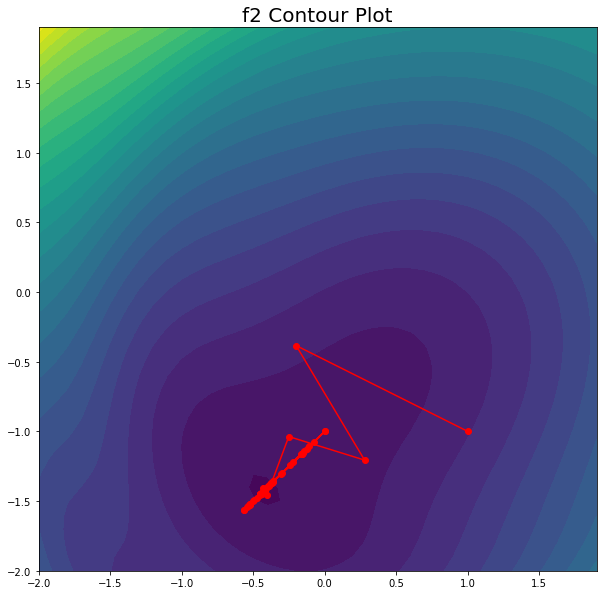

In [120]:
def function2(x):
    x_minus_a = x - a

    sin = np.sin(np.dot(x_minus_a.T, x_minus_a))

    x_minus_b = x - b

    product_B = np.dot(x_minus_b.T, np.dot(B, x_minus_b))
    
    return sin + product_B

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(X,Y)

x_i = np.array([X[1,0], Y[1,0]])

values2 = np.zeros((len(X), len(Y)))

for i in range(len(X[:,0])):
    for j in range(len(Y[0,:])):
        x_i = np.array([X[i,j], Y[i,j]])
        values2[i,j] = function2(x_i)

# Contour Plot of F2
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1)

steps2 = gradient_descent_f2(0.2)
# print(steps2.shape)

CS = ax.contourf(X, Y, values2, 30)

ax.plot(steps2[:,0], steps2[:,1], 'ro-')
plt.title('f2 Contour Plot', fontsize=20)

fig.savefig('f2_contour_step0.2.png')

plt.show()

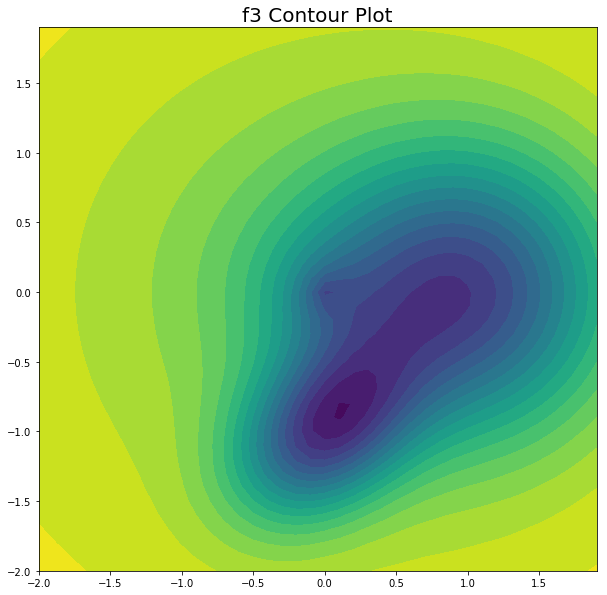

In [114]:
def function3(x):
#     print(x.shape)
    x_minus_a = x - a
    x_minus_b = x - b

    identity = np.identity(len(x)) / 100.0
#     print(identity.shape)
    det = np.linalg.det(identity + np.dot(x, x.T))
    
    xTx = np.dot(x_minus_a.T, x_minus_a)
    xT_B_x = np.dot(x_minus_b.T, np.dot(B, x_minus_b))

    exp1 = np.exp(-xTx)
    exp2 = np.exp(-xT_B_x)
    log = np.log(det) / 10.0

    return 1 - (exp1 + exp2 - log)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(X,Y)

values3 = np.zeros((len(X), len(Y)))

for i in range(len(X[:,0])):
    for j in range(len(Y[0,:])):
        x_i = np.array([X[i,j], Y[i,j]])
        values3[i,j] = function3(x_i)

# Contour Plot of F3
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1)

CS = ax.contourf(X, Y, values3, 20)

# steps3 = gradient_descent_f3(0.1)
# ax.plot(steps3[:,0], steps3[:,1], 'ro-')
plt.title('f3 Contour Plot', fontsize=20)

fig.savefig('f3_contour.png')

plt.show()
